# New Section

In [0]:

def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [0]:
# Unpickling uploaded data
train1 = unpickle('drive/My Drive/data_batch_1')
train2 = unpickle('drive/My Drive/data_batch_2')
train3 = unpickle('drive/My Drive/data_batch_3')
train4 = unpickle('drive/My Drive/data_batch_4')
train5 = unpickle('drive/My Drive/data_batch_5')
test=unpickle('drive/My Drive/test_batch')

In [0]:
# Importing everything required to build our model
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

In [0]:
train_x = np.concatenate((train1[b'data'], train2[b'data'], train3[b'data'], train4[b'data'], train5[b'data']),axis=0)
train_y = np.concatenate((train1[b'labels'], train2[b'labels'], train3[b'labels'], train4[b'labels'], train5[b'labels']),axis=0)
 
# Converts image to (width x height x num_channel) format
b = np.reshape(train_x,(50000,3,32,32))
train_x = np.transpose(b,(0,2,3,1))
test_x=np.array(test[b'data'])
b= np.reshape(test_x,(10000,3,32,32))
test_x=np.transpose(b,(0,2,3,1))
test_x=test_x.astype('float32')/255
test_y=np.array(test[b'labels'])
test_y=np.expand_dims(test_y,axis=-1)
 
# Normalizes the data between 0 and 1
train_x = train_x.astype('float32')/255
train_y = np.expand_dims(train_y,axis=-1)

In [0]:
# Training and Testing Data
x_train = train_x[:50000]
y_train = train_y[:50000]
val_x = test_x[:10000]
val_y = test_y[:10000]

In [0]:
# Adding layers and specifying operations for our model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(300, activation='relu'))
model.add(Dense(20, activation='softmax'))
 
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [0]:
# Data Augmentation to give our model the ability to generalize slightly better
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(width_shift_range=0.1,
                                    height_shift_range=0.1,
                                    horizontal_flip=True,)
                                  

In [30]:
train_generator = train_datagen.flow(x_train, y_train, batch_size=100,shuffle=True)
history = model.fit_generator(train_generator, steps_per_epoch=500, validation_data=(val_x, val_y),epochs=15)
# Running our model on the data


Epoch 1/15
500/500 [==============================] - 438s 876ms/step - loss: 1.5358 - acc: 0.4586 - val_loss: 1.3083 - val_acc: 0.5466
Epoch 2/15
500/500 [==============================] - 440s 879ms/step - loss: 1.1304 - acc: 0.5955 - val_loss: 1.0783 - val_acc: 0.6400
Epoch 3/15
500/500 [==============================] - 439s 878ms/step - loss: 0.9565 - acc: 0.6613 - val_loss: 0.8498 - val_acc: 0.7060
Epoch 4/15
500/500 [==============================] - 439s 877ms/step - loss: 0.8571 - acc: 0.6963 - val_loss: 0.9010 - val_acc: 0.6905
Epoch 5/15
500/500 [==============================] - 439s 878ms/step - loss: 0.7888 - acc: 0.7226 - val_loss: 0.8382 - val_acc: 0.7149
Epoch 6/15
500/500 [==============================] - 441s 881ms/step - loss: 0.7371 - acc: 0.7395 - val_loss: 0.6607 - val_acc: 0.7721
Epoch 7/15
500/500 [==============================] - 435s 870ms/step - loss: 0.7022 - acc: 0.7528 - val_loss: 0.6879 - val_acc: 0.7672
Epoch 8/15
500/500 [============================

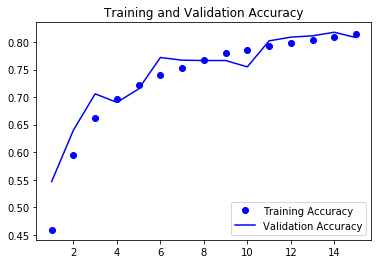

In [31]:
train_acc = history.history['acc']
validation_acc = history.history['val_acc']
epochs = range(1,16)
plt.plot(epochs,train_acc,'bo',label='Training Accuracy')
plt.plot(epochs,validation_acc,'b',label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
# Plot of Training and Testing Accuracy

In [38]:
from keras.preprocessing import image
img=image.load_img('drive/My Drive/960x0.jpg',target_size=(32,32))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
images=np.vstack([x])
classes=model.predict_classes(images)
print (classes)
#Sample prediction for random image

[0]
